Imports

In [1]:
import pandas 
import numpy
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

Setting data

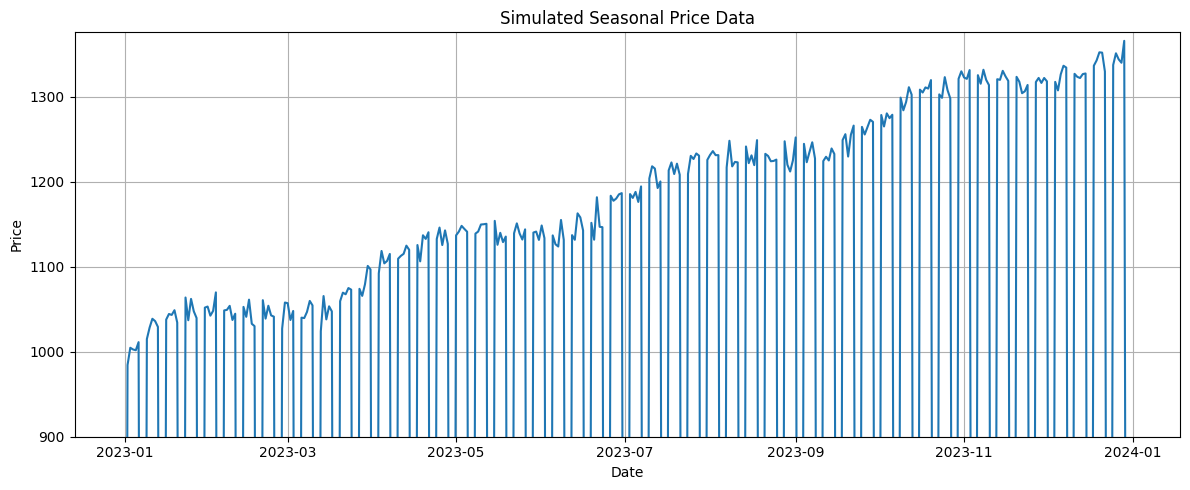

In [378]:
# Configuration
start_date = "2023-01-01"
end_date = "2023-12-31"
zero_on_weekends = True  # Set True if you want prices to be 0 on weekends

# Generate date range
dates = pandas.date_range(start=start_date, end=end_date, freq="D")
seasonal_plus_linear_growth_dataframe = pandas.DataFrame({"date": dates})
seasonal_plus_linear_growth_dataframe["day_of_year"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofyear
seasonal_plus_linear_growth_dataframe["day_of_week"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofweek  # 0=Mon, ..., 6=Sun

# Generate seasonal pattern (using sine curve)
# Example: simulate higher prices in middle of year (summer)
seasonal_pattern = 1000 + 20 * numpy.sin(8 * numpy.pi * seasonal_plus_linear_growth_dataframe["day_of_year"] / 365) #

# Add some trend (e.g., slow increase over time)
trend = seasonal_plus_linear_growth_dataframe["day_of_year"] * 1

# Add random noise
noise = numpy.random.normal(0, 10.0, size=len(seasonal_plus_linear_growth_dataframe))

# Final price = seasonality + trend + noise
seasonal_plus_linear_growth_dataframe["price"] = seasonal_pattern + trend + noise

# Optionally zero out weekends
if zero_on_weekends:
    seasonal_plus_linear_growth_dataframe.loc[seasonal_plus_linear_growth_dataframe["day_of_week"] >= 5, "price"] = 0

# Plot result
plt.figure(figsize=(12, 5))
plt.plot(seasonal_plus_linear_growth_dataframe["date"], seasonal_plus_linear_growth_dataframe["price"])
plt.title("Simulated Seasonal Price Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.ylim(900, seasonal_plus_linear_growth_dataframe["price"].max() + 10)
plt.tight_layout()
plt.show()

# Save to CSV
seasonal_plus_linear_growth_dataframe[["date", "price"]].to_csv("Data/seasonal_plus_linear_growth.csv", index=False)

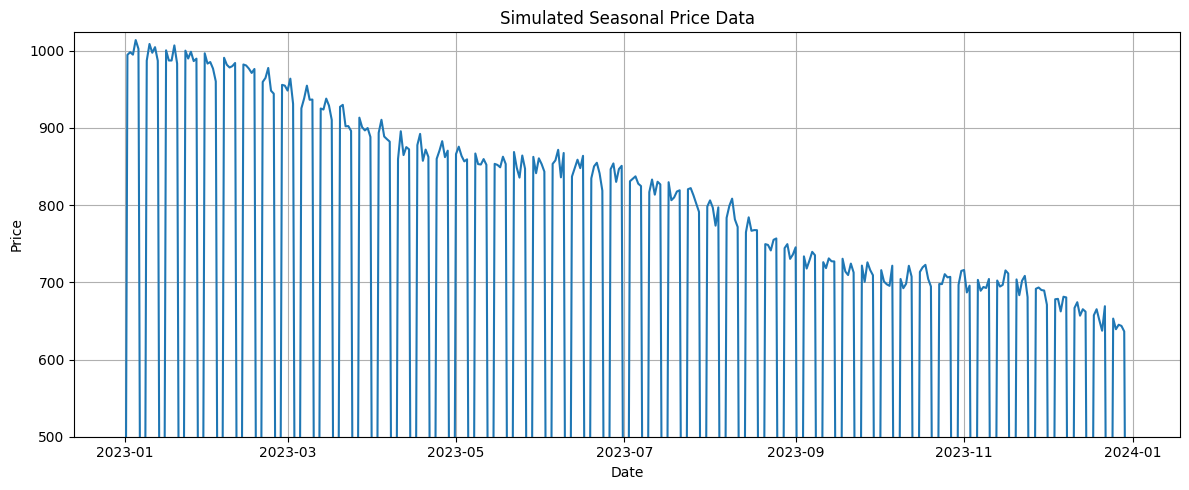

In [381]:
# Configuration
start_date = "2023-01-01"
end_date = "2023-12-31"
zero_on_weekends = True  # Set True if you want prices to be 0 on weekends

# Generate date range
dates = pandas.date_range(start=start_date, end=end_date, freq="D")
seasonal_plus_linear_growth_dataframe = pandas.DataFrame({"date": dates})
seasonal_plus_linear_growth_dataframe["day_of_year"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofyear
seasonal_plus_linear_growth_dataframe["day_of_week"] = seasonal_plus_linear_growth_dataframe["date"].dt.dayofweek  # 0=Mon, ..., 6=Sun

# Generate seasonal pattern (using sine curve)
# Example: simulate higher prices in middle of year (summer)
seasonal_pattern = 1000 + 20 * numpy.sin(5 * numpy.pi * seasonal_plus_linear_growth_dataframe["day_of_year"] / 365) #

# Add some trend (e.g., slow increase over time)
trend = seasonal_plus_linear_growth_dataframe["day_of_year"] * 1

# Add random noise
noise = numpy.random.normal(0, 10.0, size=len(seasonal_plus_linear_growth_dataframe))

# Final price = seasonality + trend + noise
seasonal_plus_linear_growth_dataframe["price"] = seasonal_pattern - trend + noise

# Optionally zero out weekends
if zero_on_weekends:
    seasonal_plus_linear_growth_dataframe.loc[seasonal_plus_linear_growth_dataframe["day_of_week"] >= 5, "price"] = 0

# Plot result
plt.figure(figsize=(12, 5))
plt.plot(seasonal_plus_linear_growth_dataframe["date"], seasonal_plus_linear_growth_dataframe["price"])
plt.title("Simulated Seasonal Price Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.ylim(500, seasonal_plus_linear_growth_dataframe["price"].max() + 10)
plt.tight_layout()
plt.show()

# Save to CSV
seasonal_plus_linear_growth_dataframe[["date", "price"]].to_csv("Data/seasonal_plus_linear_decrease.csv", index=False)

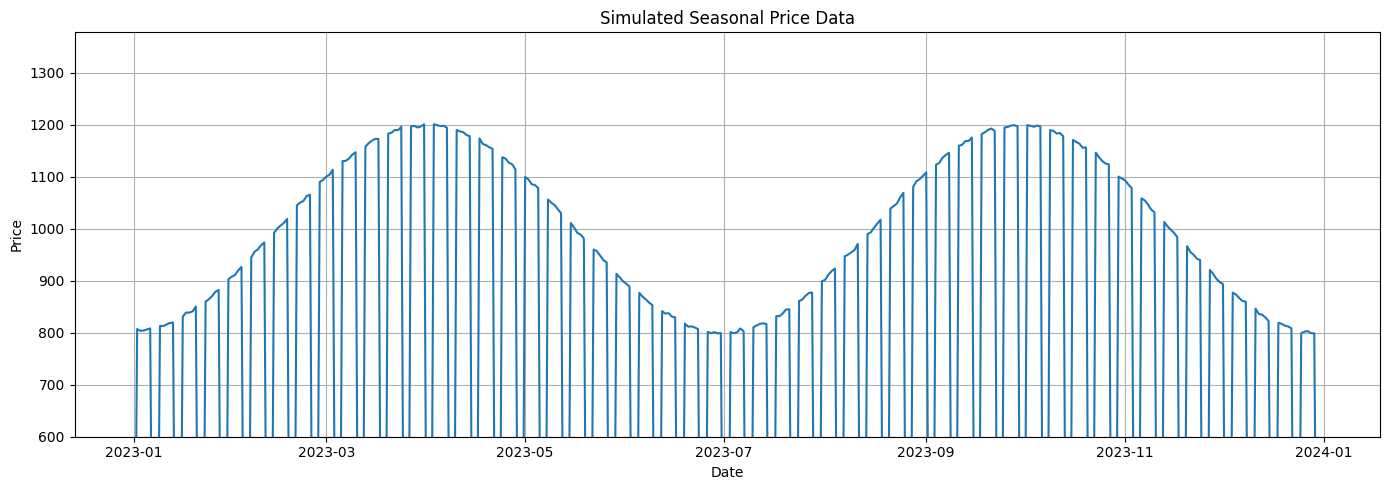

In [90]:
# Configuration
start_date = "2023-01-01"
end_date = "2023-12-31"
zero_on_weekends = True  # Set True if you want prices to be 0 on weekends

# Generate date range
dates = pandas.date_range(start=start_date, end=end_date, freq="D")
seasonal__dataframe = pandas.DataFrame({"date": dates})
seasonal__dataframe["day_of_year"] = seasonal__dataframe["date"].dt.dayofyear
seasonal__dataframe["day_of_week"] = seasonal__dataframe["date"].dt.dayofweek  # 0=Mon, ..., 6=Sun

# Generate seasonal pattern (using sine curve)
# Example: simulate higher prices in middle of year (summer)
shift_days = 45
seasonal_pattern = 1000 + 200 * numpy.sin(4 * numpy.pi * (seasonal__dataframe["day_of_year"] - shift_days) / 365)

# Add random noise
noise = numpy.random.normal(0, 2.0, size=len(seasonal__dataframe))

# Final price = seasonality + trend + noise
seasonal__dataframe["price"] = seasonal_pattern + noise

# Optionally zero out weekends
if zero_on_weekends:
    seasonal__dataframe.loc[seasonal__dataframe["day_of_week"] >= 5, "price"] = 0

# Plot result
plt.figure(figsize=(14, 5))
plt.plot(seasonal__dataframe["date"], seasonal__dataframe["price"])
plt.title("Simulated Seasonal Price Data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.ylim(600, seasonal_plus_linear_growth_dataframe["price"].max() + 10)
plt.show()

# Save to CSV
seasonal__dataframe[["date", "price"]].to_csv("Data/seasonal_price_data.csv", index=False)

In [ ]:
# df_300 = pandas.read_csv("Data/quality_controls2.csv")
# cols = ['frequency', 'costType', 'risk_id', 'created_at']
# df_300 = df_300[cols]
# df_300['date'] = pandas.to_datetime(df_300['created_at'])
# df_300['date'] = df_300['date'].dt.date


# unit_price = {
#     'finishing': 5,
#     'scrap':     50
# }
# df_300['unit_price'] = df_300['costType'].map(unit_price) # type: ignore
# df_300['price'] = df_300['frequency'] * df_300['unit_price']

# df_300 = (
#     df_300
#     .groupby(['date','risk_id'], as_index=False)['price']
#     .sum()
# )
# df_300 = df_300.set_index('date')

# df_risk1 = df_300[df_300['risk_id'] == 3]

SES - Simple exponential smoothing

Total forecasted price: 310,166.44


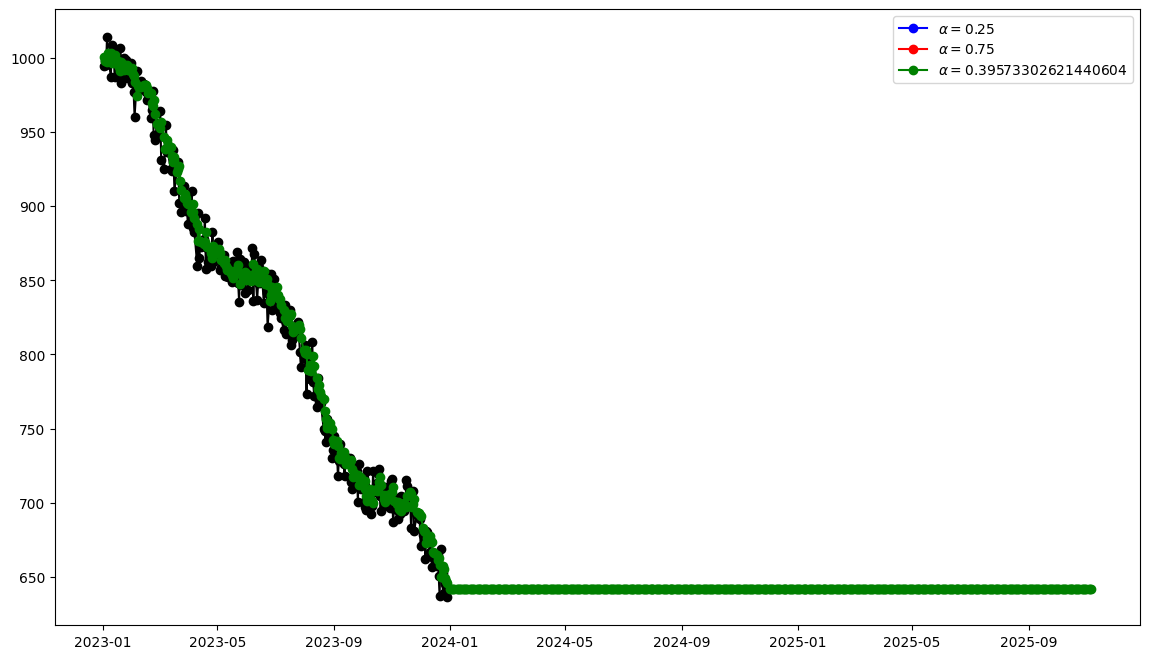

In [389]:
project_start_date = datetime.strptime("2025-05-04", "%Y-%m-%d")
project_end_date = datetime.strptime("2027-05-04", "%Y-%m-%d")
current_date = datetime.strptime("2025-06-27", "%Y-%m-%d")

#number of working days
count_excluding_end = pandas.bdate_range(start=current_date, end=project_end_date).size

prices_dataframe = pandas.read_csv("Data/seasonal_plus_linear_decrease.csv")
# Ensure datetime and set index
prices_dataframe['date'] = pandas.to_datetime(prices_dataframe['date'])
prices_dataframe = prices_dataframe.set_index('date')
train = prices_dataframe[prices_dataframe.index.dayofweek < 5]['price']
train = prices_dataframe['price']
train = train.asfreq('C')

model_1  = SimpleExpSmoothing(train).fit(smoothing_level=0.25,optimized=False)   
model_2  = SimpleExpSmoothing(train).fit(smoothing_level=0.75,optimized=False)       

# # alpha oznacava odnos pravih i prediktovanih podataka u algoritmu. 25% znaci da je 25% vrednost predikcije a 75% realna vrednost.
fcast1 = model_1.forecast(count_excluding_end).rename(r"$\alpha=0.25$")
fcast2 = model_2.forecast(count_excluding_end).rename(r"$\alpha=0.75$")

fit3 = SimpleExpSmoothing(train, initialization_method = "heuristic").fit()
fcast3 = fit3.forecast(count_excluding_end).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

plt.figure(figsize=(14, 8))
plt.plot(train, marker="o", color="black")
# plt.plot(model_1.fittedvalues, marker="o", color="blue")
# (line1,) = plt.plot(fcast1, marker="o", color="blue")
# plt.plot(model_2.fittedvalues, marker="o", color="red")
# (line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, marker="o", color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

total_fcast3 = fcast3.sum()
print(f"Total forecasted price: {total_fcast3:,.2f}")

Linear regression

In [390]:
#Feature engineering

project_start_date = datetime.strptime("2023-01-01", "%Y-%m-%d")
project_end_date = datetime.strptime("2028-01-01", "%Y-%m-%d")
current_date = datetime.strptime("2023-12-31", "%Y-%m-%d")

days_for_training = pandas.date_range(start=project_start_date, end=current_date, freq='D')
days_to_predict = pandas.date_range(start=current_date, end=project_end_date, freq='D')

days_to_predict = days_to_predict[days_to_predict.dayofweek < 5]

df_risk1 = prices_dataframe.reindex(days_for_training, fill_value=0)
df_risk1.index.name = 'date'

df_risk1 = df_risk1[df_risk1.index.dayofweek < 5]

df_risk1['weekday'] = df_risk1.index.dayofweek

df_feat = df_risk1.copy().reset_index()
df_feat['is_saturday'] = (df_feat['weekday'] == 5).astype(int)
df_feat['is_sunday']   = (df_feat['weekday'] == 6).astype(int)
df_feat['dayofweek'] = df_feat['date'].dt.dayofweek
df_feat['quarter'] = df_feat['date'].dt.quarter
df_feat['month'] = df_feat['date'].dt.month
df_feat['year'] = df_feat['date'].dt.year
df_feat['dayofyear'] = df_feat['date'].dt.dayofyear
df_feat['dayofmonth'] = df_feat['date'].dt.day
df_feat['weekofyear'] = df_feat['date'].dt.isocalendar().week.astype(int)
df_feat['days_since_start'] = (df_feat['date'] - project_start_date).dt.days

# print(df_feat.tail(10))

x = df_feat.drop(columns=['price', 'date','weekday'])
y = df_feat['price']

predict_df = pandas.DataFrame(index=days_to_predict)
predict_df.index.name = 'date'


predict_df['dayofweek']      = predict_df.index.dayofweek
predict_df['is_saturday']  = (predict_df.index.dayofweek == 5).astype(int)
predict_df['is_sunday']    = (predict_df.index.dayofweek == 6).astype(int)
predict_df['quarter']      = predict_df.index.quarter
predict_df['month']        = predict_df.index.month
predict_df['year']         = predict_df.index.year
predict_df['dayofyear']    = predict_df.index.dayofyear
predict_df['dayofmonth']   = predict_df.index.day
predict_df['weekofyear']   = predict_df.index.isocalendar().week.astype(int)
predict_df['days_since_start'] = (predict_df.index - project_start_date).days

In [391]:
from xgboost import XGBRegressor

selected_featuers = ['days_since_start']

x_train = x[selected_featuers]
x_prediction = predict_df[selected_featuers]

model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(
    x_train, y
)

preds = model.predict(x_prediction)
print(preds)
forecast = pandas.Series(preds, index=x_prediction.index, name='predicted_price')




[642.4541 642.4541 642.4541 ... 642.4541 642.4541 642.4541]


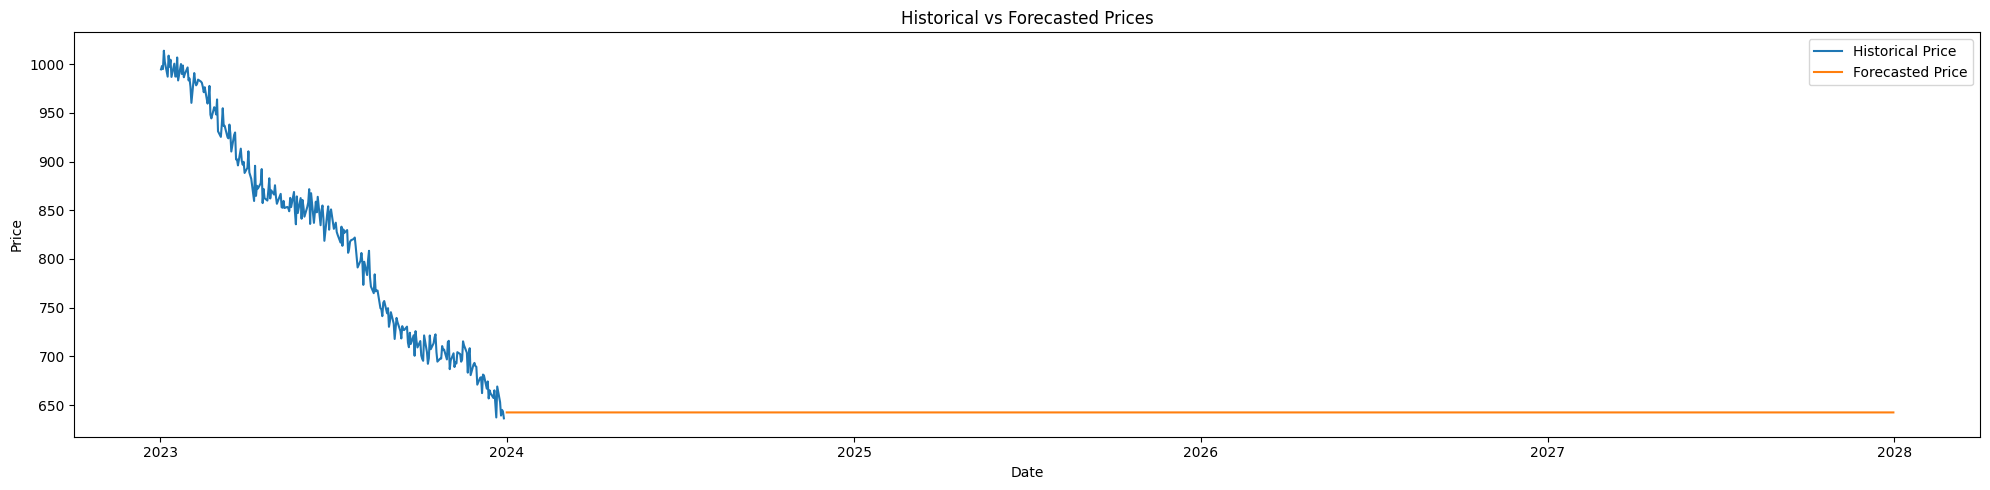

Total forecasted price: 671,364.50


In [392]:
#Graph
plt.figure(figsize=(20, 5))
plt.plot(df_feat['date'], df_feat['price'], label='Historical Price')
plt.plot(forecast.index,  forecast,           label='Forecasted Price')
plt.title('Historical vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

total_forecast = forecast.sum()

print(f"Total forecasted price: {total_forecast:,.2f}")

In [393]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y, order=(5, 1, 1))
model_fit = model.fit(method_kwargs={'maxiter':300, 'disp':False})

# --- Forecast ---
n_future_days = x_prediction.size
forecast = model_fit.forecast(steps=n_future_days)
forecast_with_date = x_prediction.copy()
forecast_with_date['price'] = forecast.values
forecast = forecast_with_date
print(forecast)
# forecast = pandas.Series(forecast, index=x_prediction.index, name='predicted_price')


            days_since_start       price
date                                    
2024-01-01               365  639.603787
2024-01-02               366  636.901768
2024-01-03               367  635.967203
2024-01-04               368  634.545107
2024-01-05               369  632.486052
...                      ...         ...
2027-12-27              1821 -776.652953
2027-12-28              1822 -778.013423
2027-12-29              1823 -779.373892
2027-12-30              1824 -780.734361
2027-12-31              1825 -782.094830

[1045 rows x 2 columns]


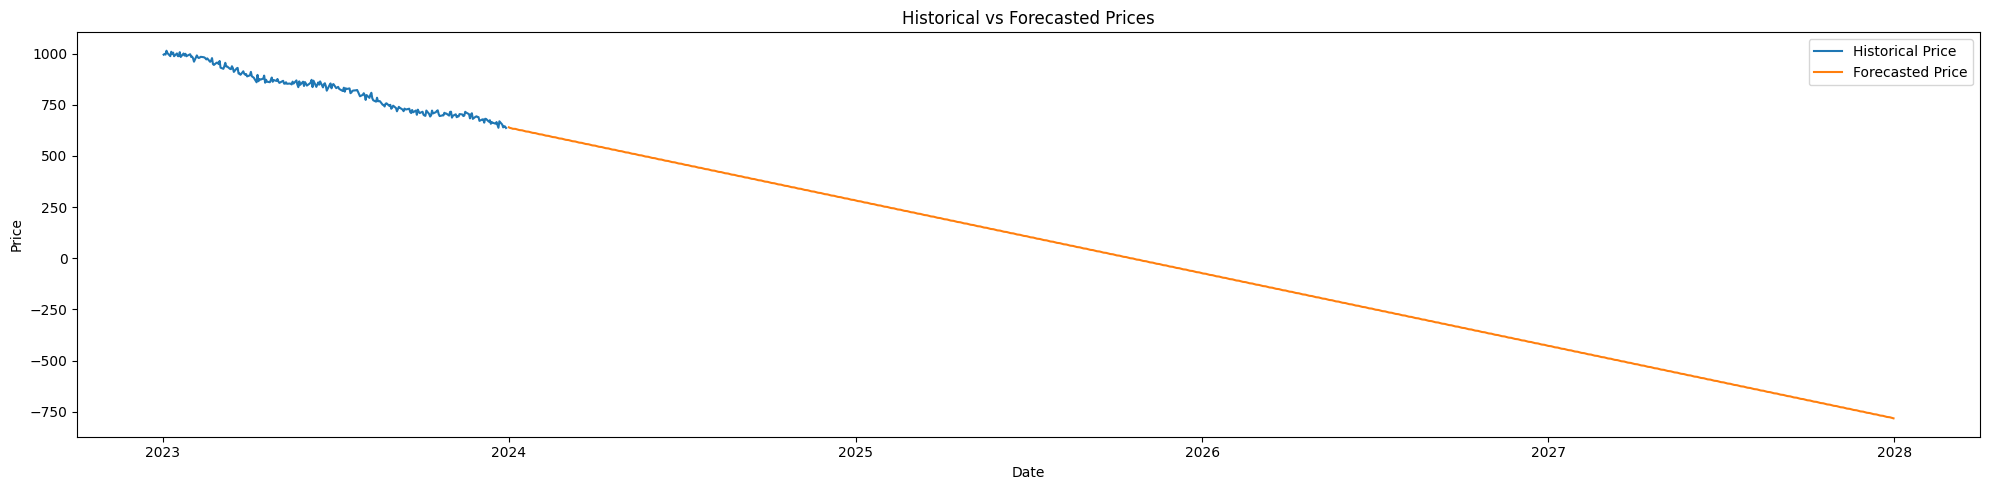

Total forecasted price: 150,086.41


In [400]:
#Graph
plt.figure(figsize=(20, 5))
plt.plot(df_feat['date'], df_feat['price'], label='Historical Price')
plt.plot(forecast.index,  forecast['price'],           label='Forecasted Price')
plt.title('Historical vs Forecasted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

total_forecast = (forecast[forecast['price'] > 0])['price'].sum()
print(f"Total forecasted price: {total_forecast:,.2f}")